# ДЗ #9. Обучение без учителя. DB-Scan <a id="0"></a>

### Датасет: https://archive.ics.uci.edu/ml/datasets/Water+Treatment+Plant

* [Загрузка и подготовка данных](#1)
* [ML](#2)
    * PCA
    * DBSCAN
    * TSNE
    * UMAP
* [Вывод](#3)

In [96]:
# Импорт основных библиотек
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
warnings.filterwarnings("ignore")
np.random.seed(42)

---
<a id="1"></a>
## Загрузка и подготовка данных [(Наверх)](#0) 

Согласно даташиту была заменена целевая переменная 'class' сторонней обработкой. В этот ноутбук не приложил, чтоб не перегружать информацией

In [13]:
url = ['https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data']
filename = './data/plants.csv'
column_names = ['class', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P',
                'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D',
                'PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P',
                'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']

if not os.path.exists(filename):
    plants_df = pd.read_csv(url[0], names=column_names, skipinitialspace=True, na_values='?')
    plants_df.to_csv(filename, index=False)
else:
    plants_df = pd.read_csv(filename)

# Проверим корректно ли загружен CSV
plants_df

,class,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,1,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,1,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,1,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,1,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,5,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,1,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,9,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,1,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [14]:
# Узнаем размер датасета
plants_df.shape

(527, 39)

In [15]:
# Узнаем свойства датасета
plants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   class     527 non-null    int64  
 1   Q-E       509 non-null    float64
 2   ZN-E      524 non-null    float64
 3   PH-E      527 non-null    float64
 4   DBO-E     504 non-null    float64
 5   DQO-E     521 non-null    float64
 6   SS-E      526 non-null    float64
 7   SSV-E     516 non-null    float64
 8   SED-E     502 non-null    float64
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     487 non-null    float64
 12  SS-P      527 non-null    int64  
 13  SSV-P     516 non-null    float64
 14  SED-P     503 non-null    float64
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     499 non-null    float64
 18  DQO-D     518 non-null    float64
 19  SS-D      525 non-null    float64
 20  SSV-D     514 non-null    float6

In [16]:
# Проверим на дубликаты и удалим если есть
plants_df.drop_duplicates(inplace=True)
plants_df.duplicated().sum()

0

In [17]:
# Заменим NaN
plants_df.fillna(plants_df.mean(), inplace=True)

In [18]:
# Разобьем датасет на X и y
plants_X = plants_df.drop(['class'], axis=1)
plants_y = plants_df['class']

---
<a id="2"></a>
## ML [(Наверх)](#0) 

In [10]:
# Импортируем библиотеки для ML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [21]:
# Cтандартизируем переменные
scaler = StandardScaler()
plants_scaled = scaler.fit_transform(plants_X)

### PCA

In [44]:
pca = PCA(n_components=2)
plants_reduced = pca.fit_transform(plants_scaled)

In [45]:
plants_reduced.shape

(527, 2)

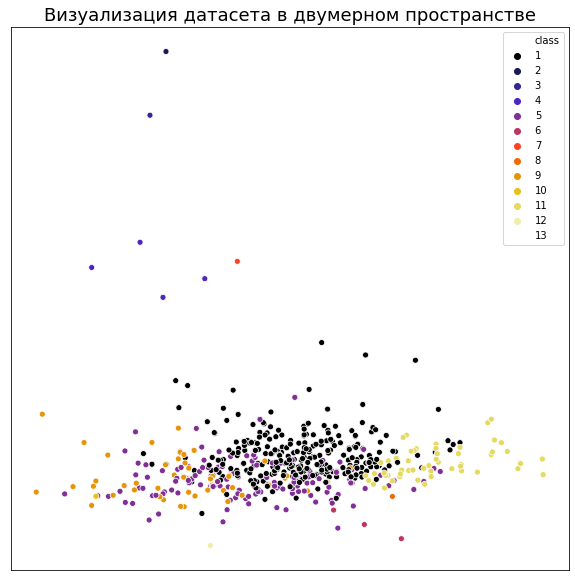

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=plants_reduced[:, 0], 
    y=plants_reduced[:, 1], 
    hue=plants_y.astype(int), 
    palette="CMRmap",
    legend='full'
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Визуализация датасета в двумерном пространстве", fontsize=18)
plt.show()

### DBSCAN

In [77]:
# Подберем параметры DBSCAN с учетом 13-ти кластеров
db = DBSCAN(eps=0.58, min_samples=2).fit(plants_reduced)

In [92]:
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Количество кластеров: %d' % n_clusters_)
print('Количество шума: %d' % n_noise_)

Количество кластеров: 13
Количество шума: 34


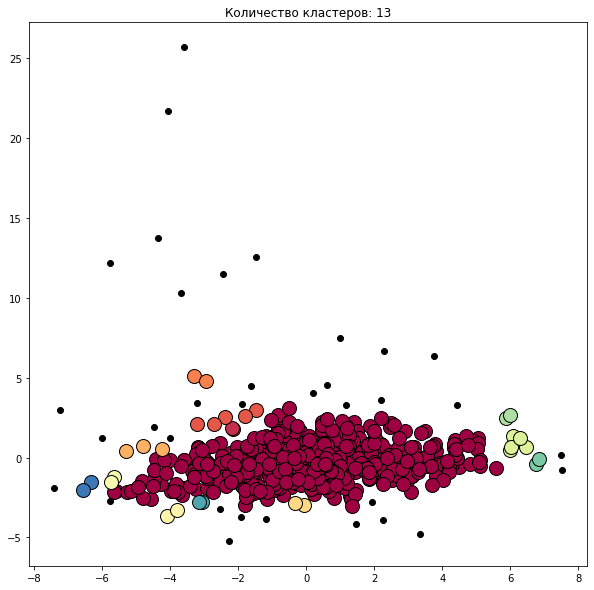

In [98]:
plt.figure(figsize=(10, 10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = plants_reduced[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = plants_reduced[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Количество кластеров: %d' % n_clusters_)
plt.show()

### TSNE

In [105]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=24, n_jobs=-1)
tsne_transformed = tsne.fit_transform(plants_scaled)

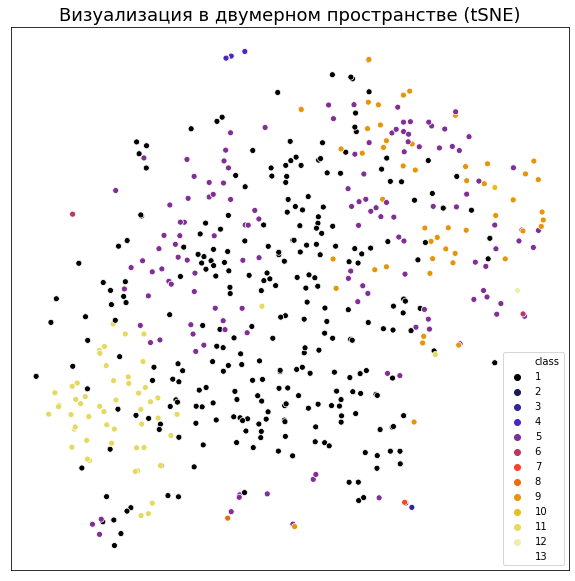

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1], 
    hue=plants_y.astype(int), 
    palette="CMRmap",
    legend='full'
)
plt.title("Визуализация в двумерном пространстве (tSNE)", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

### UMAP

In [85]:
import umap

In [86]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(plants_scaled)

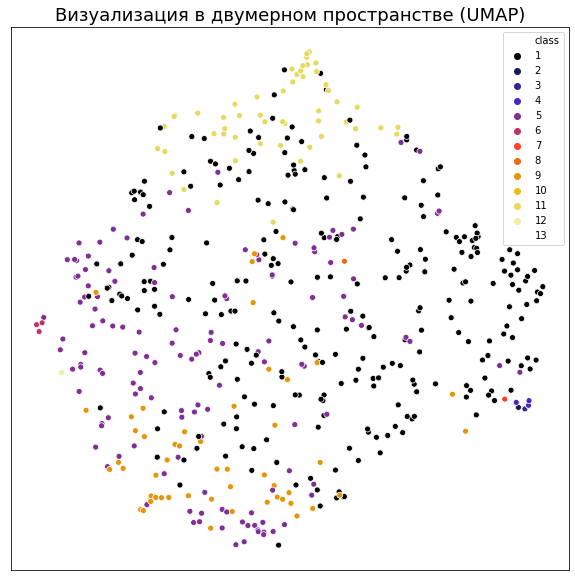

In [100]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    hue=plants_y.astype(int), 
    palette="CMRmap", 
    legend='full'
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Визуализация в двумерном пространстве (UMAP)", fontsize=18)

plt.show()

---
<a id="3"></a>
## Вывод [(Наверх)](#0) 

Более выраженная картина получилась с помощью DBSCAN (с помощью снижения размерности через PCA). При обработке методами tSNE и UMAP немного размытая картина. Причина скорее всего из-за размера датасета, либо синтетичности данных